In [10]:
# Import the relevant python libraries
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from numpy import histogram
import seaborn as sns
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

In [7]:
# Load datasets
%store -r  materna
%store -r  res_dataset

## Question 1: What is the Mean Age of Maternal Mortality within the dataset? How does  compare to the Actual Mean Age of Maternal Mortality in Mexico?

In [8]:
# Create variable for maternal death
age_mortality = materna['Age at Death']

# Determine sample size for maternal death 
sample_size = len(age_mortality)
sample_size

16631

#### Plot Sample Age of Maternal Death Distribution

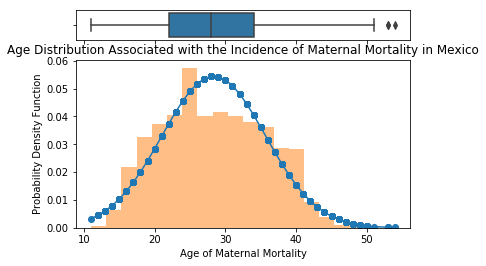

'The sample(n=16631) population mean age of maternal death is 28.36 years old with a standard deviation of 7.32.'

In [11]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(age_mortality, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(age_mortality, np.mean(age_mortality), np.std(age_mortality))
pl.plot(age_mortality, fit, '-o')
pl.hist(age_mortality, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Age of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Age Distribution Associated with the Incidence of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(sample_size) + ') population mean age of maternal death is ' + str(round(np.mean(age_mortality), 2)) + ' years old with a standard deviation of ' + str(round(np.std(age_mortality), 2)) + '.'


*Preliminary* **Conclusion**: The distribution appears to be generally normally distributed based off of the histogram of the maternal age at time of death. Since binning bias can occur, the Cumulative Distribution Function (CDF) needs to be analyzed. Based off of the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size ( n ) gets larger - regardless of what the shape of the population distribution. Under this theorem,  n>30  is considered a large sample size. Since the current database sample size  n  = 16636, CLT can be assumed.

#### Create an Empirical and Theoretical Cumulative Distribution Function (CDF)

In [12]:
# Create an Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
   
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

#### Seed a Random Number Generator and Calculate Theoretical Dataset with Normal Distribution

In [13]:
# Seed the random number generator
np.random.seed(15)

# Compute the theoretical CDF 
cdf_mean = np.mean(age_mortality)
cdf_std = np.std(age_mortality)

# Simulate a random sample with the same distribution and size of 10,000
cdf_samples = np.random.normal(cdf_mean, cdf_std, size=10000)
cdf_samples

array([26.06938246, 30.8408931 , 27.21478506, ..., 33.86292071,
       22.34971923, 28.10358655])

#### Apply the ecdf() function to Empirical and Theoretical Data to Calculate the CDFs

In [14]:
# Compute the CDFs
x_death, y_death = ecdf(age_mortality)
x_norm, y_norm = ecdf(cdf_samples)

#### Plot the Theoretical (normalized) CDF with the Empirical (sample) CDF

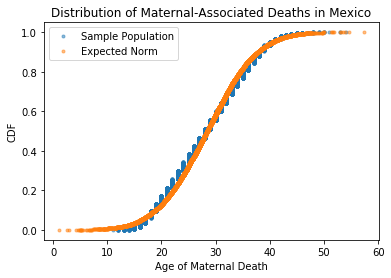

In [15]:
# Plot both ECDFs on same the same figure
fig = plt.plot(x_death, y_death, marker='.', linestyle='none', alpha=0.5)
fig = plt.plot(x_norm, y_norm, marker='.', linestyle='none', alpha=0.5)

# Label figure
fig = plt.xlabel('Age of Maternal Death')
fig = plt.ylabel('CDF')
fig = plt.legend(('Sample Population', 'Expected Norm'))
fig = plt.title('Distribution of Maternal-Associated Deaths in Mexico')

# Save plots
plt.show()

**Conclusion**: Since the normalized data and the sample population's empirical data follow along the same line, it can be assumed that the population sample is normally distributed.Therefore, based off of both the Central Limit Theorem (CLT) and the Empirical Cumulative Distribution Function (ECDF), the sample population of age of maternal death is normally distributed. 

## Question 2: What is the Average Age of Maternal Death within each Region of Mexico in the dataset? How does each Region Mean compare to the Sample Population mean (28.35)?

In [16]:
materna.head()

,Residence Code,Residence Name,Local Community Size,Education Completed,Age at Death,Received(0)/Not(1) Medical Assistance
0,7,Chiapas,1 a 999 habitantes,2,11,0.0
1,30,Veracruz de Ignacio de la Llave,50000 a 74999 habitantes,3,12,0.0
2,27,Tabasco,250000 a 499999 habitantes,4,12,0.0
3,15,México,2500 a 4999 habitantes,5,12,0.0
4,12,Guerrero,2500 a 4999 habitantes,2,12,1.0


Text(0.5, 1.0, 'Incidence of Maternal Mortality in Each Providence of Mexico')

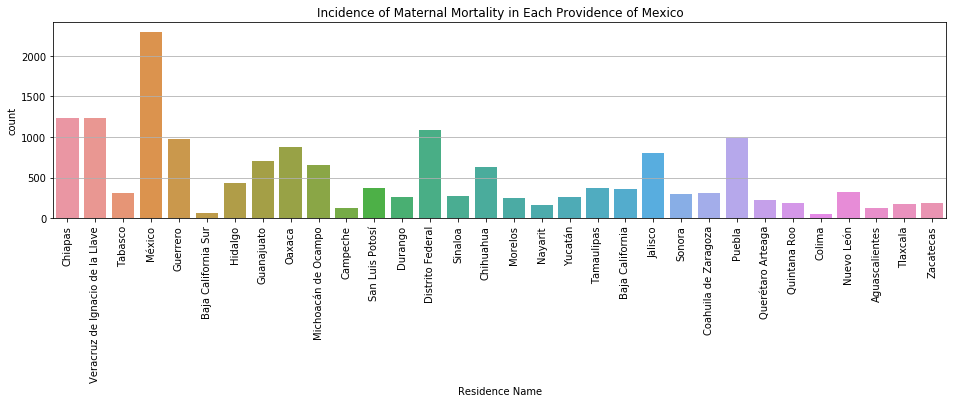

In [17]:
# Create a bar graph to show distribution of incidences of maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(materna['Residence Name'])

# Label axis 
pl.title('Incidence of Maternal Mortality in Each Providence of Mexico')

*Preliminary Observation*: It appears that certain regions have the incidence of maternal death more prevenantly than others. Further analysis needs to be performed in order to assess the cause of these differences. For now, it's important to understand that each region has a different population size. Are these populations distributed normally?

Text(0.5, 1.0, 'Age Distribution of Maternal Mortality within Each Providence of Mexico')

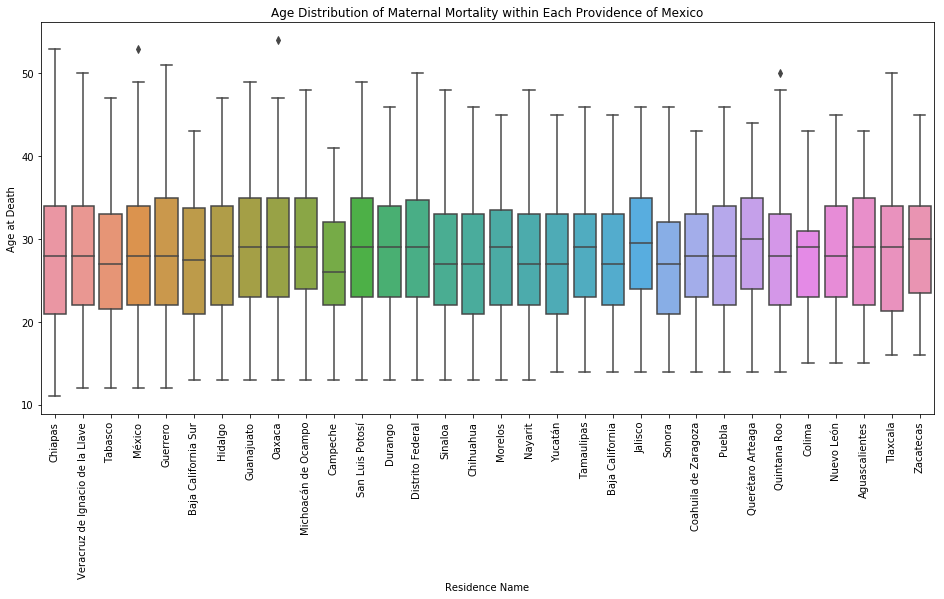

In [18]:
# Create a boxplot to show the distribution of each region compared to its mean
fig, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='vertical')
fig.subplots_adjust(bottom=0.2)
sns.boxplot(x=materna['Residence Name'], y=materna['Age at Death'], data=materna)

# Label axis 
pl.title('Age Distribution of Maternal Mortality within Each Providence of Mexico')

*Preliminary Observation*: As noted above, some Mexican States appear to experience varying instances and age distributions of maternal death. Could this be due to the size of the region or possibly the economic status of the region?

Text(0.5, 1.0, 'Regions Compared to Mexico Mean Age Maternal Mortality')

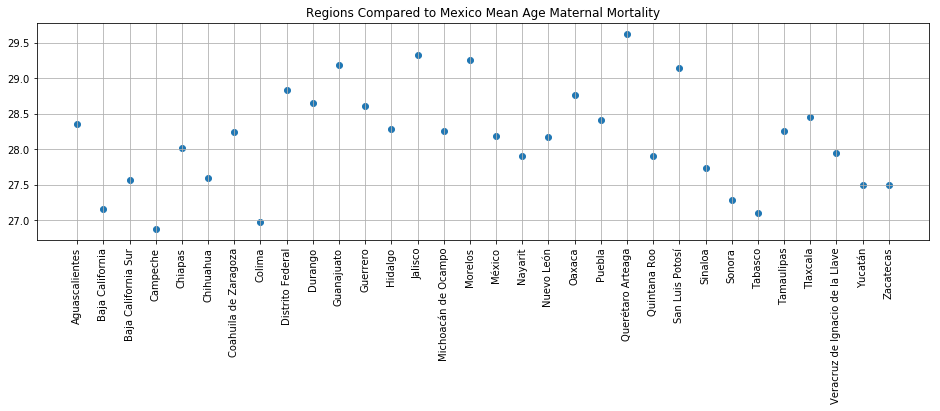

In [19]:
# Create a bar graph to show mean age maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
plt.scatter(res_dataset['Region'], res_dataset['μ Age Maternal Mortality'])

# Label axis 
pl.title('Regions Compared to Mexico Mean Age Maternal Mortality')

***Further Investigation Needed***: The difference between the means of each region within Mexico needs to be analyzed to evaluate if theres differences are statistically significant. This can be accomplished by running an ANOVA analysis.

## Question 3: Since the Differences of Means Maternal is Statistically Significant, how do the Region Mean Ages Compare to the Mexico's National Mean Age Maternal Mortality?  

Text(0.5, 1.0, 'Mean Age Maternal Mortality in Each Providence of Mexico')

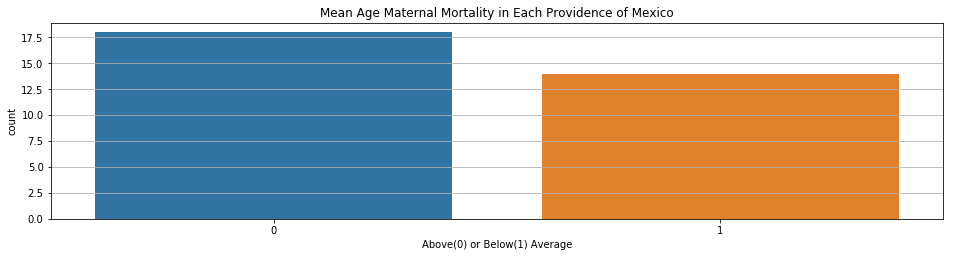

In [20]:
# Create a bar graph to show mean age maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(res_dataset['Above(0) or Below(1) Average'])

# Label axis 
pl.title('Mean Age Maternal Mortality in Each Providence of Mexico')

*Preliminary Observation*: It appears that more than half of Mexico's Regions (18 of 32) have a lower mean age of maternal mortality than the remaining 14. What are the major differences between these regions? 

In [21]:
# List Regions with a mean maternal mortality lower than population mean
len(res_dataset[res_dataset['Above(0) or Below(1) Average'] == 1])

14

## Question 5: How does the average level of Education Completed by individuals who suffered maternal mortality change by Region?
- The World Health Organization (WHO) states that better educated women tend to be healthier, participate more in the formal labor market, earn higher incomes, have fewer children, marry at a later age, and enable better health care and education for their children, should they choose to become mothers. All these factors combined can help lift households, communities, and nations out of poverty.

In [22]:
%store -r edu_dict

In [ ]:
# Plot medical care by region
x, y = zip(*edu_dict)
plt.plot(x, y)
plt.show()

# Label axis 
pl.title('Incidence of Maternal Mortality in Each Providence of Mexico')

## Question 6: How does the presence of medical care at time of recorded maternal mortality change by region, based off the materna dataset? 

In [6]:
%store -r medical_dict

In [ ]:
# Plot medical care by region
x, y = zip(*medical_dict)
plt.plot(x, y)
plt.show()

# Label axis 
pl.title('Incidence of Maternal Mortality in Each Providence of Mexico')